# DLE305 Assessment 2: Convolutional Neural Networks 

## Student Name: Michael Cuffe
## Due Date: 10/11/2024
### Description:
The goal of this notebook is to experiment with convolutional neural networks and update the code to be more readable. The code will be updated to include comments, and the code will be broken down into smaller, more manageable parts. The code will be tested to ensure that it runs without errors, and the results will be displayed in a clear and concise manner.
<br>*I have this setup to run on a jupyter server using my local runtime through my IDE, as such some errors may occur due to this.*
#### Dependencies:
- Python 3.12

The code is based on the following source:
- [Github Repo](https://colab.research.google.com/github/learn-co-students/dsc-convolutional-neural-networks-lab-online-ds-ft-100719/blob/master/index.ipynjson)



### This code cell performs the task of:
 - installing the necessary libraries using pip. The > null 2>&1 part redirects both the standard output and standard error to null, effectively silencing any output or error messages.

In [25]:
!pip install tensorflow > null 2>&1
!pip install seaborn > null 2>&1
!pip install numpy > null 2>&1
!pip install pillow > null 2>&1

### This code cell performs the task of:
 - importing the necessary libraries.

In [26]:
import tensorflow as tf
import seaborn as sns
import numpy as np
from PIL import Image
import glob
from collections import defaultdict
from tensorflow.keras import layers, models, optimizers


### This code cell performs the task of:
 - defining a function `pixels_from_path` that resizes an image to a specified size and converts it to a NumPy array.


In [27]:
IMG_SIZE = (94, 125)
def pixels_from_path(file_path):
    im = Image.open(file_path)
    im = im.resize(IMG_SIZE)
    np_im = np.array(im)
    return np_im

### This code cell performs the task of:
 - using the glob module to get the file paths of all the images in the cats folder.

In [28]:
glob.glob('cats/*')

['cats\\cat.0.jpg',
 'cats\\cat.1.jpg',
 'cats\\cat.10.jpg',
 'cats\\cat.100.jpg',
 'cats\\cat.1000.jpg',
 'cats\\cat.10000.jpg',
 'cats\\cat.10001.jpg',
 'cats\\cat.10002.jpg',
 'cats\\cat.10003.jpg',
 'cats\\cat.10004.jpg',
 'cats\\cat.10005.jpg',
 'cats\\cat.10006.jpg',
 'cats\\cat.10007.jpg',
 'cats\\cat.10008.jpg',
 'cats\\cat.10009.jpg',
 'cats\\cat.1001.jpg',
 'cats\\cat.10010.jpg',
 'cats\\cat.10011.jpg',
 'cats\\cat.10012.jpg',
 'cats\\cat.10013.jpg',
 'cats\\cat.10014.jpg',
 'cats\\cat.10015.jpg',
 'cats\\cat.10016.jpg',
 'cats\\cat.10017.jpg',
 'cats\\cat.10018.jpg',
 'cats\\cat.10019.jpg',
 'cats\\cat.1002.jpg',
 'cats\\cat.10020.jpg',
 'cats\\cat.10021.jpg',
 'cats\\cat.10022.jpg',
 'cats\\cat.10023.jpg',
 'cats\\cat.10024.jpg',
 'cats\\cat.10025.jpg',
 'cats\\cat.10026.jpg',
 'cats\\cat.10027.jpg',
 'cats\\cat.10028.jpg',
 'cats\\cat.10029.jpg',
 'cats\\cat.1003.jpg',
 'cats\\cat.10030.jpg',
 'cats\\cat.10031.jpg',
 'cats\\cat.10032.jpg',
 'cats\\cat.10033.jpg',
 'cats\\c

### This code cell performs the task of:
 - counting the occurrences of different image shapes in the cats folder. It uses the pixels_from_path function to get the shape of each image and stores the counts in a defaultdict.

In [29]:
shape_counts = defaultdict(int)
for i, cat in enumerate(glob.glob('cats/*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(cat).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1

0
100
200
300
400
500
600
700
800
900


### This code cell performs the task of:
 - sorting the shape_counts dictionary items by their counts in descending order and storing the sorted items in the shape_items list.

In [30]:
shape_items = list(shape_counts.items())
shape_items.sort(key = lambda x: x[1])
shape_items.reverse()

### This code cell performs the task of:
 - setting up parameters for the data processing and model training:

In [31]:
# 10% of the data will automatically be used for validation
validation_size = 0.1
img_size = IMG_SIZE # resize images to be 374x500 (most common shape)
num_channels = 3 # RGB
sample_size = 8192 #We'll use 8192 pictures (2**13)

### This code cell performs the task of:
 - loading the training data by counting the number of image files in the cats folder.


In [32]:
len(glob.glob('cats/*'))

12500

### This code cell performs the task of:
 - testing the function pixels_from_path by getting the shape of the image at index 5 in the cats folder.

In [33]:
pixels_from_path(glob.glob('cats/*')[5]).shape

(125, 94, 3)

### This code cell performs the task of:
 - loading and verifying the shape of an image from the cats folder. It uses the glob module to get file paths, the PIL library to open and resize images, and NumPy to convert images to arrays.

In [34]:
import glob
from PIL import Image
import numpy as np

IMG_SIZE = (94, 125)

def pixels_from_path(file_path):
    try:
        im = Image.open(file_path)
        im = im.resize(IMG_SIZE)
        np_im = np.array(im)
        return np_im
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Check the file paths
file_paths = glob.glob('cats/*')
print(f"Found {len(file_paths)} files.")

# Verify the image file at index 5
if len(file_paths) > 5:
    image_shape = pixels_from_path(file_paths[5])
    if image_shape is not None:
        print(f"Image shape: {image_shape.shape}")
    else:
        print("Failed to process the image.")
else:
    print("Not enough files found.")

Found 12500 files.
Image shape: (125, 94, 3)


### This code cell performs the task of:
 - loading training data for cats and dogs by using the pixels_from_path function to process the images and convert them to NumPy arrays. It loads the first 2048 images from the cats and dogs folders.

In [35]:
SAMPLE_SIZE = 2048
print("loading training cat images...")
cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('cats/*')[:SAMPLE_SIZE]])
print("loading training dog images...")
dog_train_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('dogs/*')[:SAMPLE_SIZE]])

loading training cat images...
loading training dog images...


### This code cell performs the task of:
 - loading the validation data for cats and dogs by using the pixels_from_path function to process the images and convert them to NumPy arrays. 
    - It loads the last 512 images from the cats and dogs folders

In [36]:
valid_size = 512
print("loading validation cat images...")
cat_valid_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('cats/*')[-valid_size:]])
print("loading validation dog images...")
dog_valid_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('dogs/*')[-valid_size:]])

loading validation cat images...
loading validation dog images...


T### This code cell performs the task of:
 - loading the validation data for cats and dogs by concatenating the cat_valid_set and dog_valid_set arrays into a single array x_valid and creating the corresponding labels array labels_valid. 
  - The labels are set to 1 for cats and 0 for dogs.

In [37]:
x_train = np.concatenate([cat_train_set, dog_train_set])
labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])

### This code cell performs the task of:
 - loading the validation data for cats and dogs by concatenating the `cat_valid_set` and `dog_valid_set` arrays into a single array `x_valid` and creating the corresponding labels array `labels_valid`. 
  - The labels are set to 1 for cats and 0 for dogs.

In [38]:
x_valid = np.concatenate([cat_valid_set, dog_valid_set])
labels_valid = np.asarray([1 for _ in range(valid_size)]+[0 for _ in range(valid_size)])

### This code cell performs the task of:
 - checking the shape of the training data.

In [77]:
x_train.shape

(4096, 125, 94, 3)

T### This code cell performs the task of:
 - checking the shape of the training data.

In [40]:
labels_train.shape

(4096,)

# Run of the Mill MLP

### This code cell performs the task of:
 - defining a simple neural network model using TensorFlow and Keras. The model consists of an input layer, a flattening layer, a dense layer with ReLU activation, and an output layer with sigmoid activation.

In [41]:
from tensorflow import keras
from tensorflow.keras import layers

total_pixels = img_size[0] *img_size[1] * 3
fc_size = 512

inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
x = layers.Flatten(name = 'flattened_img')(inputs) #turn image to vector.

x = layers.Dense(fc_size, activation='relu', name='first_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model


### This code cell performs the task of:
 - compiling a Keras model using the Adam optimizer with a learning rate of 0.001, the mean squared error loss function, and binary cross-entropy as a metric.
#### Changes:
- lr was not recognised so it was changed to learning_rate

In [42]:
customAdam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="mean_squared_error",
              # List of metrics to monitor
              metrics=["binary_crossentropy"])

### This code cell performs the task of:
 - reshaping the labels_train and labels_valid arrays to match the output shape of the model, prints a message indicating that the model is being fit on the training data, and then fits the model using the training data and validation data.
#### Changes:
- Reshape labels_train to match the model's output shape

In [43]:
# Reshape labels to match the output shape
labels_train = labels_train.reshape(-1, 1)
labels_valid = labels_valid.reshape(-1, 1)

print('Fit model on training data')

history = model.fit(x_train,
                    labels_train,
                    batch_size=32,
                    shuffle=True,
                    epochs=10,
                    validation_data=(x_valid, labels_valid))

Fit model on training data
Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - binary_crossentropy: 1360.8787 - loss: 0.5178 - val_binary_crossentropy: 1993.0193 - val_loss: 0.5000
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - binary_crossentropy: 2046.7698 - loss: 0.5095 - val_binary_crossentropy: 1993.0203 - val_loss: 0.5000
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - binary_crossentropy: 2015.8652 - loss: 0.5025 - val_binary_crossentropy: 1993.0203 - val_loss: 0.5000
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - binary_crossentropy: 2051.4202 - loss: 0.5099 - val_binary_crossentropy: 1993.0203 - val_loss: 0.5000
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - binary_crossentropy: 2014.0220 - loss: 0.5020 - val_binary_crossentropy: 1993.0203 - val_loss: 0.5000
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - binary_crossentropy: 2031.2592 - loss: 0.5036 - val_binary_crossentropy: 1993.0203 - val_loss: 0.5000
Epoch 7/10
128/128 ━━━━━━━━

# Single Convolutional Layer'


### This code cell performs the task of:
 -  defining a convolutional neural network model using TensorFlow and Keras. The model consists of an input layer, a convolutional layer with ReLU activation, a max pooling layer, a flattening layer, two dense layers with ReLU activation, and an output layer with sigmoid activation.

#### Changes from Source:
- lr was not recognised so it was changed to learning_rate


In [44]:
fc_layer_size = 128
img_size = IMG_SIZE

conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
conv_layer = layers.Conv2D(24, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)
conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

### Changes:
- lr was not recognised so it was changed to learning_rate

### This code cell performs the task of:
 - compiling a convolutional neural network model using the Adam optimizer with a learning rate of 1e-6, the binary cross-entropy loss function, and monitors both binary cross-entropy and mean squared error as metrics.

In [45]:
customAdam = keras.optimizers.Adam(learning_rate=1e-6)
conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

### Changes:
- Reshape labels_train to match the model's output shape

### This code cell performs the task of:
 - fitting the convolutional neural network model on the training data. 
  - It reshapes the labels_train and labels_valid arrays to match the output shape of the model, 
    - prints a message indicating that the model is being fit on the training data, 
        - and then fits the model using the training data and validation data.

In [46]:
print('# Fit model on training data')

# Reshape labels_train to match the model's output shape
labels_train = labels_train.reshape(-1, 1)
labels_valid = labels_valid.reshape(-1, 1)

history = conv_model.fit(x_train, 
                    labels_train, # we pass it the labels
                    # If the model is taking forever to train, make this bigger
                    # If it is taking forever to load for the first epoch, make this smaller
                    batch_size=32, 
                    shuffle=True,
                    epochs=5,
                    # We pass it validation data to
                    # monitor loss and metrics
                    # at the end of each epoch
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - binary_crossentropy: 5.0626 - loss: 5.0626 - mean_squared_error: 0.4641 - val_binary_crossentropy: 2.5576 - val_loss: 2.5576 - val_mean_squared_error: 0.4007
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - binary_crossentropy: 2.4073 - loss: 2.4073 - mean_squared_error: 0.4113 - val_binary_crossentropy: 2.1727 - val_loss: 2.1727 - val_mean_squared_error: 0.3937
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - binary_crossentropy: 1.8565 - loss: 1.8565 - mean_squared_error: 0.3781 - val_binary_crossentropy: 1.8997 - val_loss: 1.8997 - val_mean_squared_error: 0.3819
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - binary_crossentropy: 1.6177 - loss: 1.6177 - mean_squared_error: 0.3601 - val_binary_crossentropy: 1.7302 - val_loss: 1.7302 - val_mean_squared_error: 0.3710
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - binary_crossentropy: 1.3492 - loss: 1.3492 - mean_squared_error: 0.33

### Changes:
- Flatten the predictions to match the shape of the labels

### This code cell performs the task of:
 - predicting values using the convolutional neural network model, flattens the predictions and validation labels to ensure they are 1-dimensional, and then calculates the correlation coefficient between the predictions and the validation labels.

In [47]:
import numpy as np

# Predict values
preds = conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])

# Ensure preds and labels_valid are 1-dimensional
preds = np.asarray(preds).flatten()
labels_valid = np.asarray(labels_valid).flatten()

# Calculate correlation coefficient
np.corrcoef(preds, labels_valid)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[1.        , 0.15747791],
       [0.15747791, 1.        ]])

### This code cell performs the task of:
 - creating a scatter plot

<Axes: >

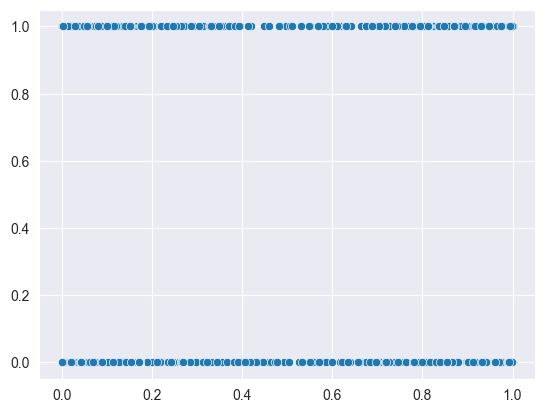

In [48]:
sns.scatterplot(x= preds, y= labels_valid)

This code block calculates and prints the proportion of positive labels (i.e., labels_valid equal to 1) for different threshold values applied to the predictions (preds). Here's a step-by-step explanation:  
1. cat_quantity = sum(labels_valid): This line calculates the total number of positive labels in labels_valid.  
2. The for loop iterates over a range of threshold values from 0.1 to 0.9 (in increments of 0.1).  
3. Inside the loop:  
- ```print('threshold :'+str(.1*i))``` This line prints the current threshold value.
- ```print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])```: This line calculates and prints the proportion of positive labels for predictions greater than the current threshold. 
    - It does this by:
        - Filtering labels_valid to include only those entries where the corresponding preds value is greater than the current threshold (.1*i).
        - Summing the filtered labels_valid values to get the count of positive labels.
        - Dividing this count by the total number of filtered entries to get the proportion of positive labels.
        - The output will show how the proportion of positive labels changes as the threshold increases.

In [49]:
cat_quantity = sum(labels_valid)

for i in range(1,10):
    print('threshold :'+str(.1*i))
    print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])

threshold :0.1
0.5511363636363636
threshold :0.2
0.5538221528861155
threshold :0.30000000000000004
0.5580204778156996
threshold :0.4
0.5582255083179297
threshold :0.5
0.5708661417322834
threshold :0.6000000000000001
0.5787234042553191
threshold :0.7000000000000001
0.5839080459770115
threshold :0.8
0.5862068965517241
threshold :0.9
0.5814696485623003


### This code cell performs the task of:
 - printing the mean of the predictions
    - The mean of the predictions for the negative class (labels equal to 0)
        - The mean of the predictions for the positive class (labels equal to 1)

In [50]:
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.49656576
0.4324331
0.56069845


# Bigger Convolutional Model

### This code cell performs the task of:
 - defining a bigger convolutional neural network model using TensorFlow and Keras. 
    - The model consists of: 
        - an input layer, 
        - two convolutional layers with ReLU activation, 
        - two max pooling layers, 
        - a flattening layer, 
        - and two dense layers with ReLU activation, 
        - followed by an output layer with sigmoid activation.

In [51]:
fc_layer_size = 256
img_size = IMG_SIZE

conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_layer = layers.Conv2D(48, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

### Changes:
- lr was not recognised so it was changed to learning_rate

### This code cell performs the task of:
 - compiling a convolutional neural network model using the Adam optimizer with a learning rate of 1e-6, the binary cross-entropy loss function, and monitors both binary cross-entropy and mean squared error as metrics.

In [52]:
customAdam = keras.optimizers.Adam(learning_rate=1e-6)
conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

### Changes:
- Reshape labels_train to match the model's output shape

### This code cell performs the task of:
 - This code cell performs the task of fitting the convolutional neural network model on the training data. It reshapes the labels_train and labels_valid arrays to match the output shape of the model, prints a message indicating that the model is being fit on the training data, and then fits the model using the training data and validation data.

In [53]:
# Fit model on training data
print('# Fit model on training data')

# Reshape labels_train to match the model's output shape
labels_train = labels_train.reshape(-1, 1)
labels_valid = labels_valid.reshape(-1, 1)

history = conv_model.fit(x_train, 
                    labels_train, # we pass it the labels
                    # If the model is taking forever to train, make this bigger
                    # If it is taking forever to load for the first epoch, make this smaller
                    batch_size=64, 
                    shuffle=True,
                    epochs=15,
                    # We pass it validation data to
                    # monitor loss and metrics
                    # at the end of each epoch
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - binary_crossentropy: 3.5265 - loss: 3.5265 - mean_squared_error: 0.4479 - val_binary_crossentropy: 2.4340 - val_loss: 2.4340 - val_mean_squared_error: 0.4133
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - binary_crossentropy: 2.2610 - loss: 2.2610 - mean_squared_error: 0.4020 - val_binary_crossentropy: 2.1302 - val_loss: 2.1302 - val_mean_squared_error: 0.4056
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - binary_crossentropy: 1.9817 - loss: 1.9817 - mean_squared_error: 0.3794 - val_binary_crossentropy: 2.0068 - val_loss: 2.0068 - val_mean_squared_error: 0.3945
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - binary_crossentropy: 1.7567 - loss: 1.7567 - mean_squared_error: 0.3579 - val_binary_crossentropy: 1.8798 - val_loss: 1.8798 - val_mean_squared_error: 0.3853
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - binary_crossentropy: 1.6154 - loss: 1.6154 - mean_squared_error: 

### This code cell performs the task of:
 - calculating the correlation coefficient

In [54]:
import numpy as np
import seaborn as sns

# Ensure preds and labels_valid are 1-dimensional
preds = np.asarray(preds).flatten()
labels_valid = np.asarray(labels_valid).flatten()

# Predict values
preds = conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])

# Calculate correlation coefficient
np.corrcoef(preds, labels_valid)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


array([[1.        , 0.18105185],
       [0.18105185, 1.        ]])

### This code cell performs the task of:
 - creating a scatter plot

<Axes: >

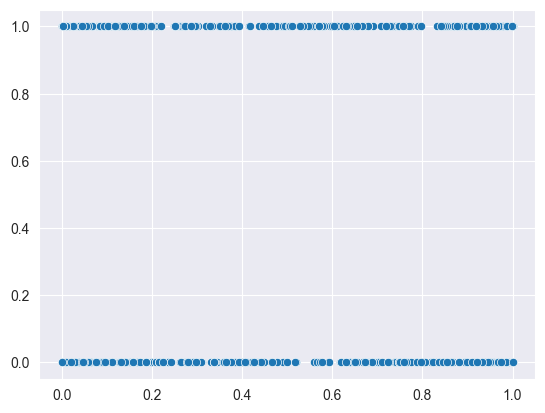

In [55]:
sns.scatterplot(x= preds, y= labels_valid)

### This code cell performs the task of:
 - calculating the mean of the predictions

In [56]:
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.46441218
0.39128095
0.5375434


T### This code cell performs the task of:
 - calculating and printing the proportion of positive labels (i.e., `labels_valid` equal to 1) for different threshold values applied to the predictions (`preds`). Here's a step-by-step explanation:

    1. `cat_quantity = sum(labels_valid)`: This line calculates the total number of positive labels in `labels_valid`.

    2. The `for` loop iterates over a range of threshold values from 0.1 to 0.9 (in increments of 0.1).

    3. Inside the loop:
        - `print('threshold :'+str(.1*i))`: This line prints the current threshold value.
        - `print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])`: This line calculates and prints the proportion of positive labels for predictions greater than the current threshold. It does this by:
            - Filtering `labels_valid` to include only those entries where the corresponding `preds` value is greater than the current threshold (`.1*i`).
            - Summing the filtered `labels_valid` values to get the count of positive labels.
            - Dividing this count by the total number of filtered entries to get the proportion of positive labels.

The output shows how the proportion of positive labels changes as the threshold increases.

In [57]:
cat_quantity = sum(labels_valid)

for i in range(1,10):
    print('threshold :'+str(.1*i))
    print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])

threshold :0.1
0.5567164179104478
threshold :0.2
0.560200668896321
threshold :0.30000000000000004
0.5727272727272728
threshold :0.4
0.5756385068762279
threshold :0.5
0.5864978902953587
threshold :0.6000000000000001
0.5833333333333334
threshold :0.7000000000000001
0.5984848484848485
threshold :0.8
0.6127167630057804
threshold :0.9
0.6410256410256411


### This code cell performs the task of:
  - The animal_pic function returns an image from the validation set at a given index
  - the cat_index function predicts the probability of the image at index 124 being a cat using the conv_model.

In [58]:
def animal_pic(index):
    return Image.fromarray(x_valid[index])
def cat_index(index):
    return conv_model.predict(np.asarray([x_valid[124]]))[0][0]

### Changes:
- added .keras to the file name

### This code cell performs the task of:
 - saving the model to a file named 'conv_model_big.keras'.

In [59]:
conv_model.save('conv_model_big.keras')

### This code cell performs the task of:
 - printing the probability of the image at index 600 being a cat and displays the image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
probability of being a cat: 0.9005081653594971


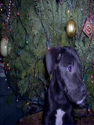

In [60]:
index = 600
print("probability of being a cat: {}".format(cat_index(index)))
animal_pic(index)

### This code cell performs the task of:
 - predicting the probability of the image at index 124 in the validation set being a cat using the convolutional neural network model.

In [61]:
conv_model.predict(np.asarray([x_valid[124]]))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


0.90050817

### Changes:
- added .keras to the file name

### This code cell performs the task of:
 - loading the 'conv_model_big.keras' model from file.

In [62]:
big_model = keras.models.load_model('conv_model_big.keras')

# Huge Model

### This code cell performs the task of:
 - defining a convolutional neural network model using TensorFlow and Keras.
   - The model consists of an input layer, two convolutional layers with ReLU activation, two max pooling layers, a flattening layer, two dense layers with ReLU activation, and an output layer with sigmoid activation.

In [63]:
fc_layer_size = 256
img_size = IMG_SIZE

conv_inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_inputs)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_layer = layers.Conv2D(128, kernel_size=3, activation='relu')(conv_layer)
conv_layer = layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_x = layers.Flatten(name = 'flattened_features')(conv_layer) #turn image to vector.

conv_x = layers.Dense(fc_layer_size, activation='relu', name='first_layer')(conv_x)
conv_x = layers.Dense(fc_layer_size, activation='relu', name='second_layer')(conv_x)
conv_outputs = layers.Dense(1, activation='sigmoid', name='class')(conv_x)

huge_conv_model = keras.Model(inputs=conv_inputs, outputs=conv_outputs)

### Changes:
- lr was not recognised so it was changed to learning_rate

### This code cell performs the task of:
 - compiing the huge_conv_model using the Adam optimizer with a learning rate of 1e-6, the binary cross-entropy loss function, and monitors both binary cross-entropy and mean squared error as metrics.

In [64]:
customAdam = keras.optimizers.Adam(learning_rate=1e-6)
huge_conv_model.compile(optimizer=customAdam,  # Optimizer
              # Loss function to minimize
              loss="binary_crossentropy",
              # List of metrics to monitor
              metrics=["binary_crossentropy","mean_squared_error"])

### This code cell performs the task of:
 - reshaping the labels_train and labels_valid arrays to match the output shape of the model, 
 - printing a message indicating that the model is being fit on the training data, 
 - Fitting the model using the training data and validation data.

#### Changes:
- Reshape labels_train to match the model's output shape

In [65]:
labels_train = labels_train.reshape(-1, 1)
labels_valid = labels_valid.reshape(-1, 1)

print('# Fit model on training data')

history = huge_conv_model.fit(x_train, 
                    labels_train,
                    batch_size=64, 
                    shuffle = True,
                    epochs=5,
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 49s 743ms/step - binary_crossentropy: 2.0168 - loss: 2.0168 - mean_squared_error: 0.4046 - val_binary_crossentropy: 1.2296 - val_loss: 1.2296 - val_mean_squared_error: 0.3399
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 865ms/step - binary_crossentropy: 1.1234 - loss: 1.1234 - mean_squared_error: 0.3257 - val_binary_crossentropy: 1.0944 - val_loss: 1.0944 - val_mean_squared_error: 0.3181
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 56s 866ms/step - binary_crossentropy: 0.9309 - loss: 0.9309 - mean_squared_error: 0.2808 - val_binary_crossentropy: 0.9745 - val_loss: 0.9745 - val_mean_squared_error: 0.2930
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 58s 904ms/step - binary_crossentropy: 0.8335 - loss: 0.8335 - mean_squared_error: 0.2599 - val_binary_crossentropy: 0.9988 - val_loss: 0.9988 - val_mean_squared_error: 0.2973
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 858ms/step - binary_crossentropy: 0.7925 - loss: 0.7925 - mean_squared_error: 0.24

### Changes:
- Flatten the predictions to match the shape of the labels

### This code cell performs the task of:
 - ensuring that preds and labels_valid are 1-dimensional, predicting values using the huge_conv_model, flattening the predictions, and calculating the correlation coefficient between the predictions and the validation labels.

In [66]:
import numpy as np

# Ensure preds and labels_valid are 1-dimensional
preds = np.asarray(preds).flatten()
labels_valid = np.asarray(labels_valid).flatten()

preds = huge_conv_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
np.corrcoef(preds, labels_valid)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step


array([[1.        , 0.24549268],
       [0.24549268, 1.        ]])

### This code cell performs the task of:
 - printing the mean of the predictions, the mean of the predictions for the negative class (labels equal to 0), and the mean of the predictions for the positive class (labels equal to 1).

In [67]:
print(preds.mean())
print(preds[labels_valid == 0].mean())
print(preds[labels_valid == 1].mean())

0.6557993
0.57737815
0.7342205


This code cell performs the task of calculating and printing the proportion of positive labels (i.e., labels_valid equal to 1) for different threshold values applied to the predictions (preds). Here's a step-by-step explanation:  
1. `cat_quantity = sum(labels_valid)`: This line calculates the total number of positive labels in labels_valid.  
2. The for loop iterates over a range of threshold values from 0.1 to 0.9 (in increments of 0.1).  
3. Inside the loop:  
    `print('threshold :'+str(.1*i))`: This line prints the current threshold value.
    `print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])`: This line calculates and prints the proportion of positive labels for predictions greater than the current threshold.
 - It does this by:
    - Filtering labels_valid to include only those entries where the corresponding preds value is greater than the current threshold `(.1*i)`.
    - Summing the filtered labels_valid values to get the count of positive labels.
    - Dividing this count by the total number of filtered entries to get the proportion of positive labels.

In [68]:
cat_quantity = sum(labels_valid)

for i in range(1,10):
    print('threshold :'+str(.1*i))
    print(sum(labels_valid[preds > .1*i])/labels_valid[preds > .1*i].shape[0])

threshold :0.1
0.5202558635394456
threshold :0.2
0.5310344827586206
threshold :0.30000000000000004
0.5453446191051995
threshold :0.4
0.5544041450777202
threshold :0.5
0.5592747559274756
threshold :0.6000000000000001
0.583206106870229
threshold :0.7000000000000001
0.5975395430579965
threshold :0.8
0.6321353065539113
threshold :0.9
0.6447761194029851


### Changes:
- added .keras to the file name

### This code cell performs the task of:
 - saving the huge_conv_model to a file named 'conv_model_huge_e13.keras'.

In [69]:
huge_conv_model.save('conv_model_huge_e13.keras')

### This code cell performs the task of:
 - loading the 'conv_model_huge_e13.keras' model from file.

In [70]:
big_model = keras.models.load_model('conv_model_huge_e13.keras')

### This code cell performs the task of:
 - predicting the probability of the image at index 124 in the validation set being a cat using the big_model.

In [71]:
preds = big_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step


### This code cell performs the task of:
 - calculating and printing the proportion of positive labels (i.e., labels_valid equal to 1) for different threshold values applied to the predictions (preds). Here's a step-by-step explanation:

In [72]:
sum(labels_valid)

512

### This code cell performs the task of:
 - calculates and prints the proportion of correct predictions (both true positives and true negatives) for different threshold values applied to the predictions (preds). Here's the code:

In [73]:
for i in range(1,10):
    t = .1*i
    print("{:.1f}:".format(t))
    tp = (preds > t)&(labels_valid==1)
    tn = (preds <= t)&(labels_valid==0)
    print(np.sum(np.where(tp|tn, 1, 0))/1024.)

0.1:
0.537109375
0.2:
0.552734375
0.3:
0.5732421875
0.4:
0.58203125
0.5:
0.5830078125
0.6:
0.6064453125
0.7:
0.6083984375
0.8:
0.6220703125
0.9:
0.5947265625


### This code cell performs the task of:
 -  Reshaping the labels_train and labels_valid arrays to match the output shape of the model,
  - printing a message indicating that the model is being fit on the training data,
    - fitting the model using the training data and validation data.
#### Changes:
- Reshaping labels_train to match the model's output shape

In [74]:
# Reshape labels_train to match the model's output shape
labels_train = labels_train.reshape(-1, 1)
labels_valid = labels_valid.reshape(-1, 1)

print('# Fit model on training data')

history = big_model.fit(x_train, 
                    labels_train, #we pass it th labels
                    #If the model is taking forever to train, make this bigger
                    #If it is taking forever to load for the first epoch, make this smaller
                    batch_size=64, 
                    shuffle = True,
                    epochs=10,
                    # We pass it validation data to
                    # monitor loss and metrics
                    # at the end of each epoch
                    validation_data=(x_valid, labels_valid))

# Fit model on training data
Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 58s 878ms/step - binary_crossentropy: 0.7665 - loss: 0.7665 - mean_squared_error: 0.2435 - val_binary_crossentropy: 0.9438 - val_loss: 0.9438 - val_mean_squared_error: 0.2855
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 58s 911ms/step - binary_crossentropy: 0.7079 - loss: 0.7079 - mean_squared_error: 0.2263 - val_binary_crossentropy: 0.9105 - val_loss: 0.9105 - val_mean_squared_error: 0.2755
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 835ms/step - binary_crossentropy: 0.6598 - loss: 0.6598 - mean_squared_error: 0.2135 - val_binary_crossentropy: 0.8389 - val_loss: 0.8389 - val_mean_squared_error: 0.2600
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 60s 932ms/step - binary_crossentropy: 0.5966 - loss: 0.5966 - mean_squared_error: 0.1943 - val_binary_crossentropy: 0.9163 - val_loss: 0.9163 - val_mean_squared_error: 0.2768
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 58s 910ms/step - binary_crossentropy: 0.5908 - loss: 0.5908 - mean_squared_error:

### This code cell performs the task of:
 -  predicting values using the big_model, flattens the predictions and validation labels to ensure they are 1-dimensional, and then calculates the correlation coefficient between the predictions and the validation labels.

In [75]:
preds = big_model.predict(x_valid)
preds = np.asarray([pred[0] for pred in preds])
for i in range(1,10):
    t = .1*i
    print("{:.1f}:".format(t))
    tp = (preds > t)&(labels_valid==1)
    tn = (preds <= t)&(labels_valid==0)
    print(np.sum(np.where(tp|tn, 1, 0))/1024.)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
0.1:
512.0
0.2:
512.0
0.3:
512.0
0.4:
512.0
0.5:
512.0
0.6:
512.0
0.7:
512.0
0.8:
512.0
0.9:
512.0


### This code cell performs the task of:
 -  saving the big_model to a file named 'conv_model_big_e19.keras'.

In [76]:
big_model.save('conv_model_big_e19.keras')